In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 4.
# Analysis of climate data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Climate indices
# (2) Empirical Orthogonal Functions

# We will work with datasets from CMIP6 archive; in the examples I will use one of the following cases:
#  psl_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
#  psl_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
#  psl_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc

# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1-SOVeb7EoB_nDWcpugyNGTB6RHiRlRnF/view?usp=sharing

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercise 2. 
# Calculate and display the EOF-NAO winter (DJFM) index from one of the CMIP6 historical simulations

# Scegliere un modello, calcolare e plottare il NAO index basato sull'EOF per dicembre, gennaio, febbraio e marzo (DJFM), dunque un indice basato sulle anaomalie di pressione dei soli mesi invernali

# Link: 
# https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-pc-based
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Abbiamo visto un altro indice che si può calcolare: The North Atlantic Oscillation Index describes changes in the strength of two recurring pressure patterns in the atmosphere over the North Atlantic: a low near Iceland, and a high near the Azores Islands.
# Positive NAOI values indicate these features are strong, creating a big pressure difference between them. Strongly positive values are linked to warm conditions across the U.S. East and Northern Europe, and cold conditions across southern Europe.
# Negative NAOI indicate these features are relatively weak, and the pressure difference between them is smaller. Strongly negative values are linked to cold conditions in the U.S. East and Northern Europe, and warm conditions in Southern Europe.

# I valori dell'indice sono calcolati come la differenza tra la pressione rilevata in una determinata località delle Azzorre e la pressione rilevata in una determinata località dell'Islanda
# ci sono vari indici, diverse varianti, che rappresentano il NAO
# Il NAO index è calcolato come differenza tra le anomalie medie di pressione a livello del mare sulle Azzorre e le anomalie osservate in Islanda.
# dovrebbe emergere dai dati la prima compoennte principale e poi la serie associata

In [5]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

import cartopy.crs as ccrs

import xarray as xr

from eofs.xarray import Eof

# Selezione modello

In [6]:
# Chose model

model = 'MRI-ESM2-0'

In [7]:
#-------------------------------------------------
#-- Read and organize Sea Level Pressure data ----
#-------------------------------------------------

#- Path to file
modfile1=''.join(['C:/Users/loren/Desktop/psl_Amon_',model,'_historical_r1i1p1f1_gn_185001-201412.nc'])
                   #psl_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
#- explore file
d1 = xr.open_dataset(modfile1)

#- extract variable (psl) - temporary variable
psl1 = d1.psl
d1

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    psl        (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-02-20T02:32:52Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            psl
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/36275bcc-884a-4960-b367-bd644a1fbb6b

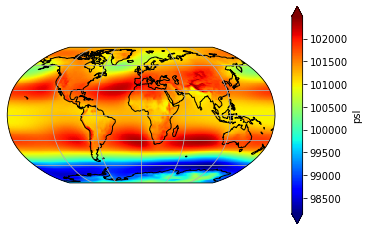

In [8]:
#- Make a visual check on time-averaged field

p0 = psl1.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet',extend='both')
p0.axes.coastlines()
p0.axes.gridlines()

# Slicing dei dati (long e lat) considerando Atlantic sector

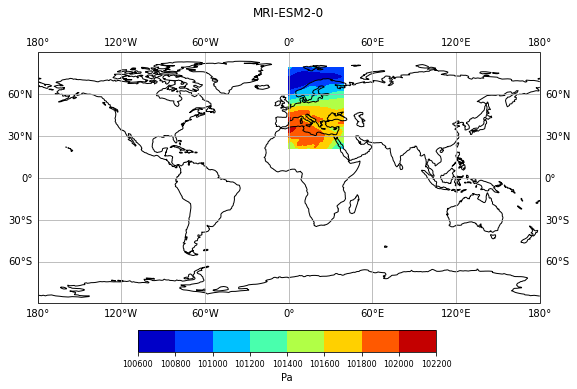

In [9]:
# dobbiamo fare sclicing dei dati
# questo indice è basato su una porzione identificato da un box latitudine e longituine (vedi sotto). Utilizzo sel per selezionare i dati che mi interessano

# ~~~ Remember ~~~
# SLP anomalies over the Atlantic sector, 20°-80°N, 90°W-40°E. 

#- focus on the region of interest 
d1_nat = d1.sel(lat=slice(20,80), lon=slice(-90,40))
psl_nat=d1_nat.psl

#- check
fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.contourf(psl_nat.lon, psl_nat.lat, psl_nat.mean(axis=0), \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.jet )   

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Pa')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

# non vedo visualizzato l'intero infatti le mie longitudini se guardo sopra era definite tra 0 e 360, motivo per il quale correggo el long nella cella successiva

In [10]:
#- Adjust longitudes

# convertiamo alla convenzione -180 ; +180

#- (Option 1: in python)
d1.coords['lon'] = (d1.coords['lon'] + 180) % 360 - 180
d1 = d1.sortby(d1.lon)

#- (Option 2: with nco from shell)
# ncap2 -O -s 'where(lon>180) lon=lon-360' ifile ofile

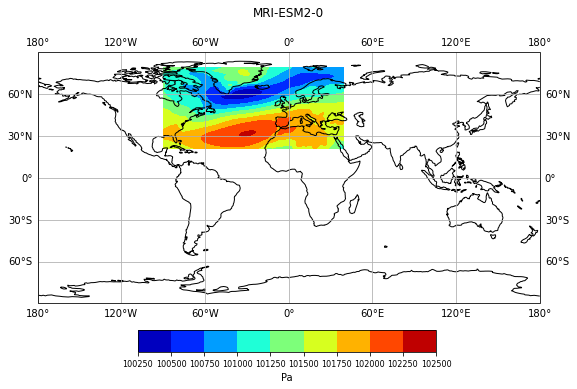

In [11]:
# re-try after fixing longitudes

#- focus on the region of interest 
d1_nat = d1.sel(lat=slice(20,80), lon=slice(-90,40))
psl_nat=d1_nat.psl

#- check
fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.contourf(psl_nat.lon, psl_nat.lat, psl_nat.mean(axis=0),
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.jet )   

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Pa')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

# ora il box è corretto

# Slicing dati (tempo) considerando i mesi invernali

In [12]:
#- focus on the season of interest (boreal winter)

# utilizzo sel sul tempo, considero la stagione invernale, su base mensile

def djfm(month):
    return ((month == 1) | (month == 2) | (month == 3) | (month == 12))

psl_nat_m = psl_nat.sel(time=djfm(psl_nat['time.month']))  # la funzione estrae il numero del mese dall'indice, io quindi vado a selezionare i soli mesi che fanno match con 1,2,3,12  -  ottengo cosi una serie temporale costituita dai soli mesi invernali

#psl_nat_ms = psl_nat_m.coarsen(time=4).mean()
# z=[0,1,2,3,4,5,6,7]
# print(z)
# print(z[3:-1])

psl_nat_ms = psl_nat_m[3:-1].coarsen(time=4).mean()  # faccio la media stagione per stagione, utilizzo la funzione coarsen, il mese di dicembre deve essere accorpato a gennaio, febbraio ecc successivi perchè sono contigui temporalmente. La stagione inizia a dicembre e finisce a marzo dell'anno dopo.

# ho dunque uan serie temporale che va a identificare la media stagionale

[0, 1, 2, 3, 4, 5, 6, 7]
[3, 4, 5, 6]


# Calcolo e visualizzo NAO index

In [15]:
#-- Calculate and plot NAO index based on EOFs ---

# Compute anomalies by removing the time-mean.
psl_anom = psl_nat_ms - psl_nat_ms.mean(dim='time') 

# utilizzo la libreria EOF
# Retrieve the leading EOF, expressed as the covariance (alternatives: e.g. correlation) 
# between the leading PC time series and the input SLP anomalies at each grid point, and the
# leading PC time series itself.

neofs=5  # numero di componenti principali che vogliamo estrarre
solver = Eof(psl_anom)

# utilizzando il sover andiamo ad estrarre gli elementi di interesse
eofs = solver.eofsAsCovariance(neofs=neofs)
pcs = solver.pcs(npcs=5, pcscaling=1)
variance_fractions = solver.varianceFraction(neigs=neofs)

In [13]:
eofs  # è il pattern spaziale associato

<xarray.DataArray 'eofs' (mode: 5, lat: 53, lon: 116)>
array([[[ 4.95730171e+01,  5.07470284e+01,  5.13776855e+01, ...,
          1.74807854e+01,  1.66224060e+01,  1.24446955e+01],
        [ 5.32650375e+01,  5.37496338e+01,  5.45408134e+01, ...,
          2.02109013e+01,  1.81969280e+01,  1.31948395e+01],
        [ 5.78308983e+01,  5.80399780e+01,  5.86629486e+01, ...,
          2.27091560e+01,  1.91571274e+01,  1.48741236e+01],
        ...,
        [-2.75612213e+02, -2.78535431e+02, -2.81648041e+02, ...,
         -4.79588135e+02, -4.77158875e+02, -4.74698425e+02],
        [-2.83163879e+02, -2.85726501e+02, -2.88341644e+02, ...,
         -4.76550293e+02, -4.74541321e+02, -4.72522705e+02],
        [-2.90367035e+02, -2.92674316e+02, -2.94834991e+02, ...,
         -4.72689697e+02, -4.71048157e+02, -4.69383728e+02]],

       [[-5.66911554e+00, -4.74773788e+00, -4.00256300e+00, ...,
          1.27325745e+01,  1.05297308e+01,  8.56305313e+00],
        [-5.68194246e+00, -5.07928753e+00, -4.32010317e+00, ...,
          1.32991877e+01,  1.08104935e+01,  9.15139294e+00],
        [-5.35767031e+00, -4.85945845e+00, -4.17515516e+00, ...,
          1.35389624e+01,  1.13693409e+01,  1.05661688e+01],
...
          1.80520752e+02,  1.84288651e+02,  1.87912857e+02],
        [-2.36484833e+01, -2.48584080e+01, -2.60375080e+01, ...,
          1.81756088e+02,  1.85224930e+02,  1.88566101e+02],
        [-1.23172865e+01, -1.32600098e+01, -1.42559061e+01, ...,
          1.83720169e+02,  1.86945526e+02,  1.90129211e+02]],

       [[ 9.29290593e-01, -2.02458650e-01, -1.84022868e+00, ...,
         -1.48296757e+01, -1.35103798e+01, -1.11190138e+01],
        [ 7.92092621e-01, -4.56956029e-01, -2.16558313e+00, ...,
         -1.62130871e+01, -1.44138832e+01, -1.17647581e+01],
        [ 6.16826117e-01, -7.72624731e-01, -2.30194116e+00, ...,
         -1.73312550e+01, -1.51678505e+01, -1.30552177e+01],
        ...,
        [-4.56489754e+01, -4.67490273e+01, -4.77601089e+01, ...,
         -8.43194580e+01, -8.58313751e+01, -8.72750778e+01],
        [-4.58726730e+01, -4.67225189e+01, -4.74833527e+01, ...,
         -8.10297546e+01, -8.23184357e+01, -8.35600891e+01],
        [-4.24720802e+01, -4.30714989e+01, -4.36432076e+01, ...,
         -7.72859879e+01, -7.83444061e+01, -7.93726425e+01]]],
      dtype=float32)
Coordinates:
  * mode     (mode) int32 0 1 2 3 4
  * lat      (lat) float64 20.75 21.87 22.99 24.11 ... 75.7 76.82 77.94 79.06
  * lon      (lon) float64 -90.0 -88.88 -87.75 -86.62 ... 36.0 37.12 38.25 39.38
Attributes:
    long_name:  covariance_between_pcs_and_psl

In [14]:
pcs  # è la serie temporale associata al pattern definito prima

<xarray.DataArray 'pcs' (time: 164, mode: 5)>
array([[-2.16454601e+00,  1.03732407e+00, -8.19575310e-01,
        -8.72942567e-01, -6.69841349e-01],
       [-2.76959300e-01, -5.52488267e-01,  1.03641534e+00,
        -3.68223377e-02,  1.58654845e+00],
       [ 1.97808790e+00, -6.58574045e-01, -9.80962336e-01,
         4.72855091e-01,  5.89007020e-01],
       [-1.54037869e+00, -2.12526903e-01,  2.08673924e-01,
         1.56836534e+00, -1.96841133e+00],
       [-2.51752615e+00, -1.26126778e+00, -3.27196568e-01,
        -1.65793478e-01, -8.64606678e-01],
       [ 6.07028544e-01,  2.93929815e+00, -8.30059826e-01,
        -6.28509462e-01,  1.96185243e+00],
       [ 1.50729787e+00, -5.47845304e-01, -1.42039061e+00,
         7.26483345e-01,  1.09411359e+00],
       [ 5.22993624e-01, -5.39083660e-01,  5.18415272e-01,
        -6.00026175e-02, -2.35173488e+00],
       [-1.95653707e-01,  7.94051290e-01, -2.38641128e-01,
        -6.98844671e-01, -4.21246946e-01],
       [-3.32575232e-01,  9.68739390e-01,  5.74509323e-01,
        -3.64794970e-01,  8.28058720e-01],
...
       [-6.42395616e-01,  1.18586458e-01,  9.63374972e-02,
        -3.55406553e-01,  4.90222901e-01],
       [ 1.45894873e+00,  1.48807153e-01, -5.12775719e-01,
        -7.22984314e-01, -1.03813231e-01],
       [-1.19679177e+00,  7.11971462e-01, -9.86575127e-01,
         7.41622567e-01, -2.00569391e+00],
       [-1.49759382e-01,  3.35342199e-01,  2.30205342e-01,
        -1.36847878e+00,  8.09055209e-01],
       [-5.54380834e-01, -9.69243467e-01,  6.93513572e-01,
        -5.06008744e-01, -9.51175988e-02],
       [-1.20335281e+00,  7.31508434e-01, -1.88272595e-01,
        -6.83014214e-01, -2.01775622e+00],
       [-9.36544061e-01, -6.91421330e-01,  6.22184575e-01,
         1.79136980e+00,  1.36172843e+00],
       [ 5.88252187e-01, -8.21896553e-01,  1.79163456e+00,
         1.05568516e+00,  8.47341493e-02],
       [ 2.29698464e-01,  1.19574499e+00,  3.02277971e-02,
         1.41944432e+00,  6.97392642e-01],
       [ 1.16158926e+00,  2.10712194e+00,  1.97596684e-01,
        -5.46649955e-02,  6.17056012e-01]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1851-01-30T21:00:00 ... 2014-01-30T21:00:00
  * mode     (mode) int32 0 1 2 3 4

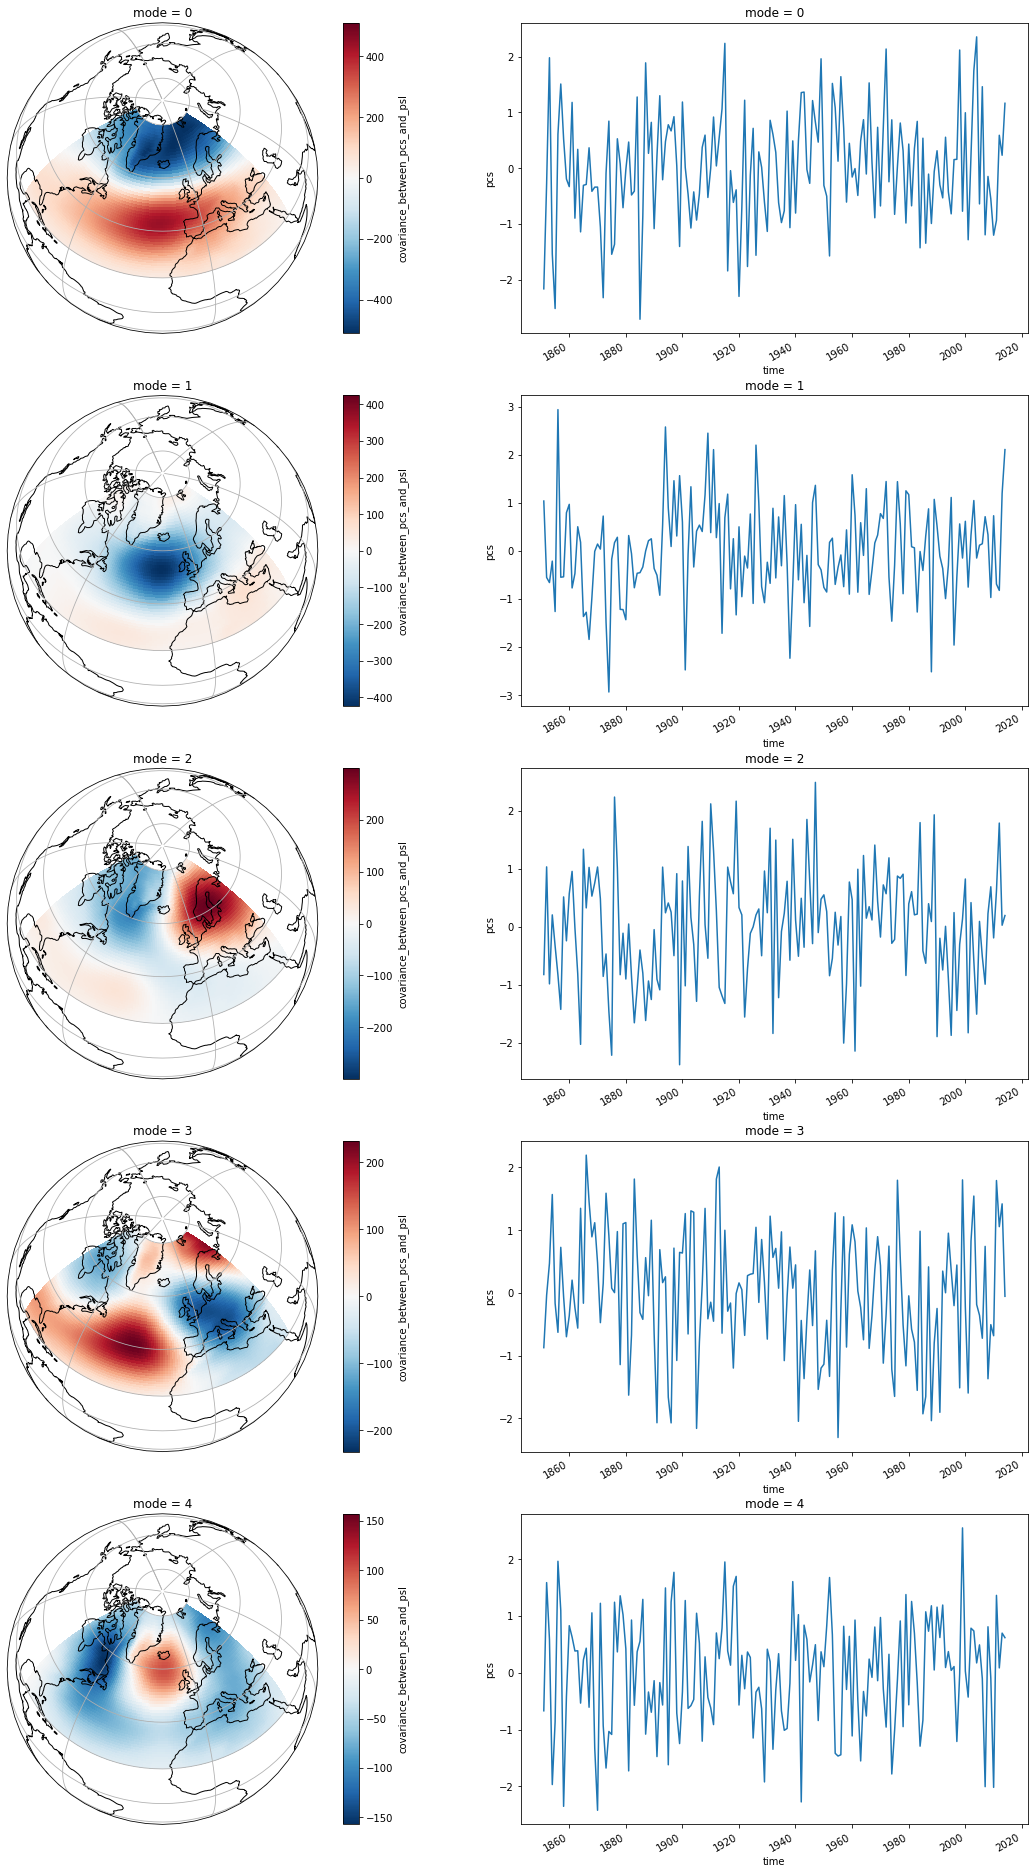

In [15]:
# vado a plottare sia la componente spaziale che temporale per tutte le emperical ortogonal funnctions

# Explore the EOFs

# Number of EOFs to show:
no=neofs

#- set multi-panel plot
fig = plt.figure(figsize=(20,40))
subplots = (no+1,2)
n_panels = subplots[0] * subplots[1]

#- plot leading EOF: spatial component of the NAO index

c=1

for i in range(0,no):
  ax = fig.add_subplot(subplots[0], subplots[1], c, 
                       projection=ccrs.Orthographic(central_longitude=-20, central_latitude=60))
  ax.set_global()
  eofs[i,:,:].plot(transform=ccrs.PlateCarree())
  ax.gridlines()
  ax.coastlines() 
  c += 1
    
  ax = fig.add_subplot(subplots[0], subplots[1], c)
  pcs[:,i].plot()
  c += 1  

# il nao index è la prima componente principale

# si può notare che le celle hanno area diversa

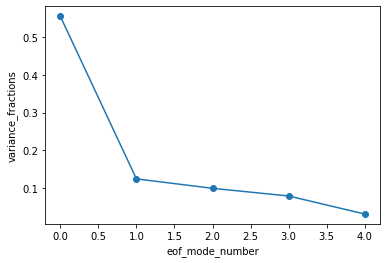

In [16]:
# Visualize how much of the variance each EOF accounts for
# visualizziamo quanta varianza spiegta per ciascuna componente principale, oltre il 50% dalla prima, quindi dalla nostra eof

ax = fig.add_subplot(subplots[0], subplots[1], c)
variance_fractions.plot(marker='o')

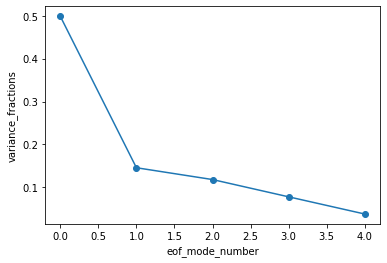

In [17]:
# Now repeat with grid-cell areas weighting, utilizzare un peso proporzionale alle aree delle celle

wgts = np.cos(np.deg2rad(psl_anom.lat.values))[..., np.newaxis]  # il peso è proporzionale al peso della latitudine converita in radianti, questa pesatura la diamo al solver

solver = Eof(psl_anom, weights=wgts)

eofs_w = solver.eofsAsCovariance(neofs=neofs)
pcs_w = solver.pcs(npcs=5, pcscaling=1)
variance_fractions_w = solver.varianceFraction(neigs=neofs)

variance_fractions_w.plot(marker='o')

# non otteniamo risultati molto diversi, piccole differenze

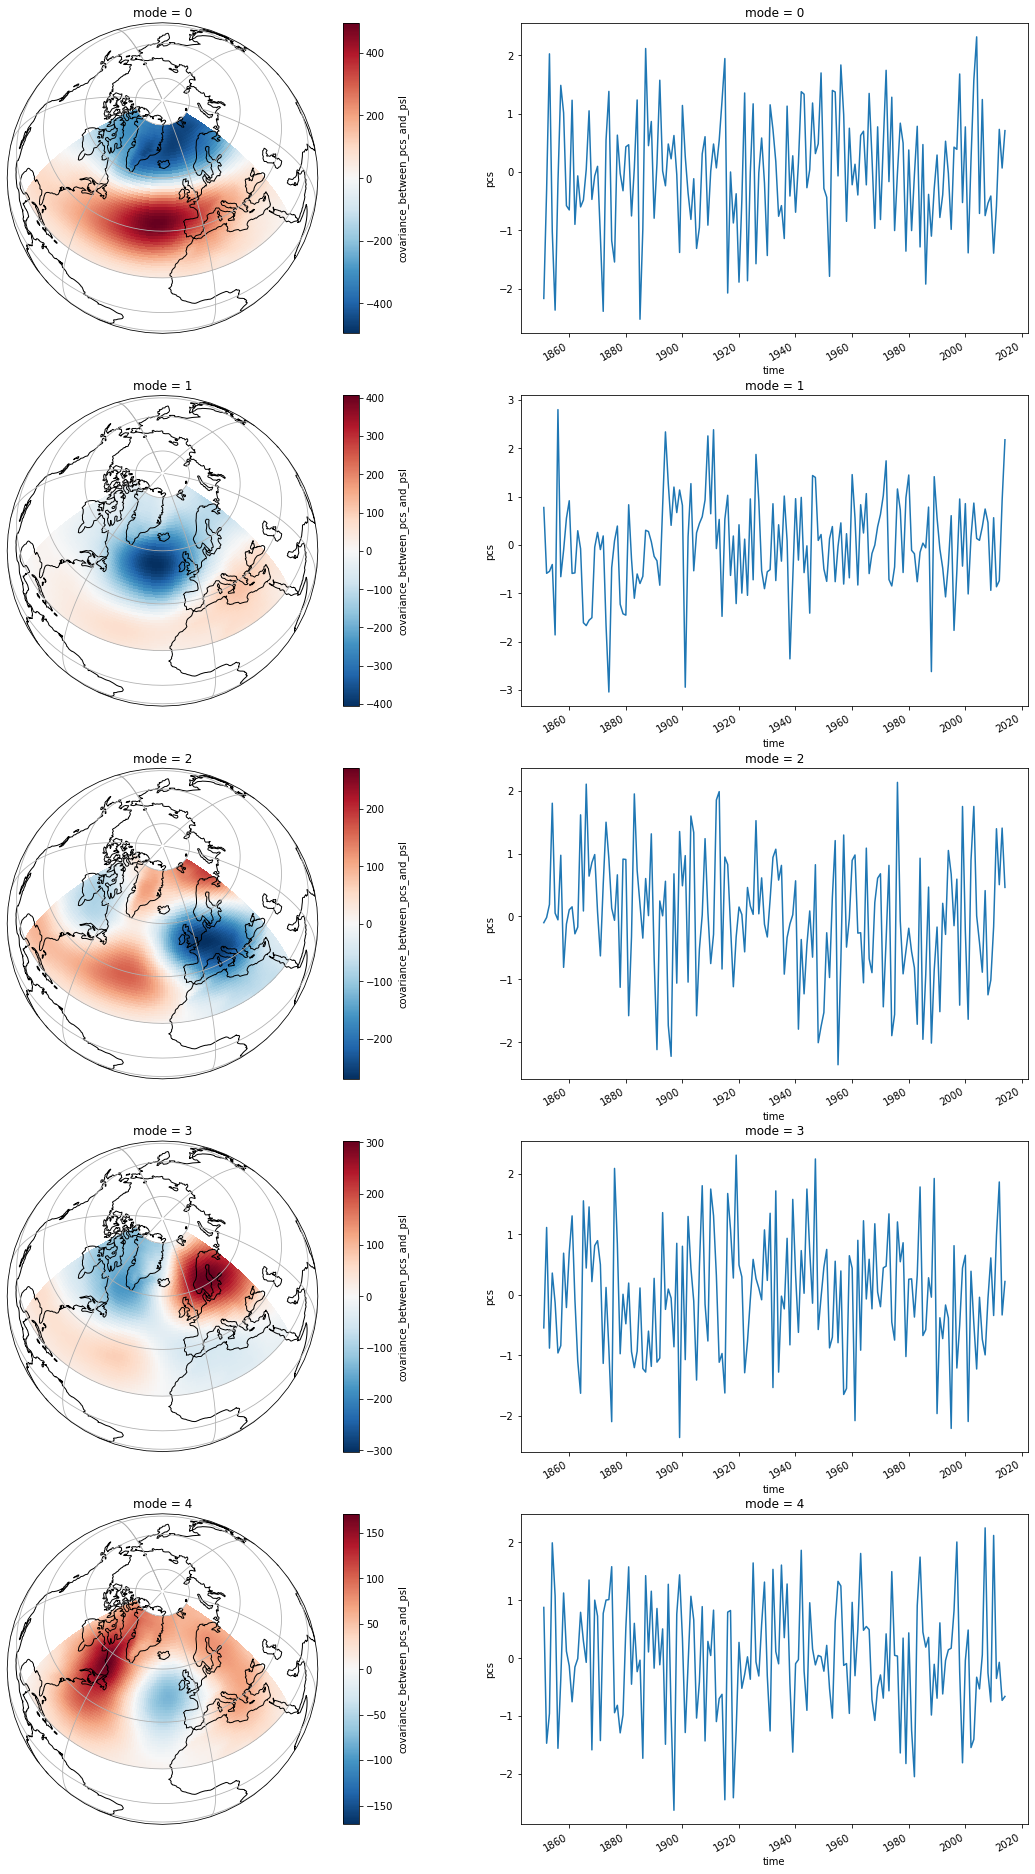

In [18]:
# Number of EOFs to show:
no=neofs

#- set multi-panel plot
fig = plt.figure(figsize=(20,40))
subplots = (no+1,2)
n_panels = subplots[0] * subplots[1]

#- plot leading EOF: spatial component of the NAO index

c=1

for i in range(0,no):
  ax = fig.add_subplot(subplots[0], subplots[1], c, 
                       projection=ccrs.Orthographic(central_longitude=-20, central_latitude=60))
  ax.set_global()
  eofs_w[i,:,:].plot(transform=ccrs.PlateCarree())
  ax.gridlines()
  ax.coastlines() 
  c += 1
    
  ax = fig.add_subplot(subplots[0], subplots[1], c)
  pcs_w[:,i].plot()
  c += 1  
